In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
param_dict = { \
    'train_size': [100, 500, 1000, 2000, 4000, 8000],
    'dim': [32, 64, 256, 512],
    'rnd_dim': [8, 16, 32, 64, 128],
    'num_layers': [2, 3, 4, 5, 6, 7],
    'num_steps': [5, 10, 20, 30, 40]
}

before_ref_1 = {}

before_ref_10 = {}

after_ref_1 = {}

after_ref_10 = {}

In [3]:
for pair in ['en_fr', 'en_ja', 'en_zh', 'fr_en', 'ja_en', 'zh_en']:
    before_ref_1[pair] = { \
    'train_size': [],
    'dim': [],
    'rnd_dim': [],
    'num_layers': [],
    'num_steps': []
}
    before_ref_10[pair] = { \
    'train_size': [],
    'dim': [],
    'rnd_dim': [],
    'num_layers': [],
    'num_steps': []
}
    after_ref_1[pair] = { \
    'train_size': [],
    'dim': [],
    'rnd_dim': [],
    'num_layers': [],
    'num_steps': []
}
    after_ref_10[pair] = { \
    'train_size': [],
    'dim': [],
    'rnd_dim': [],
    'num_layers': [],
    'num_steps': []
}
    for param in param_dict.keys():
        for val in param_dict[param]:
            with open(f'experiment_logs/{pair}/{param}.{val}.log') as fp:
                lines = fp.readlines()
                #print(lines)
                before_1 = float(lines[1].strip().split()[-3].strip(','))
                before_10 = float(lines[1].split()[-1].strip(',').strip())
                after_1 = float(lines[3].strip().split()[-3].strip(','))
                after_10 = float(lines[3].split()[-1].strip(',').strip())
            before_ref_1[pair][param].append(before_1)
            before_ref_10[pair][param].append(before_10)
            after_ref_1[pair][param].append(after_1)
            after_ref_10[pair][param].append(after_10)

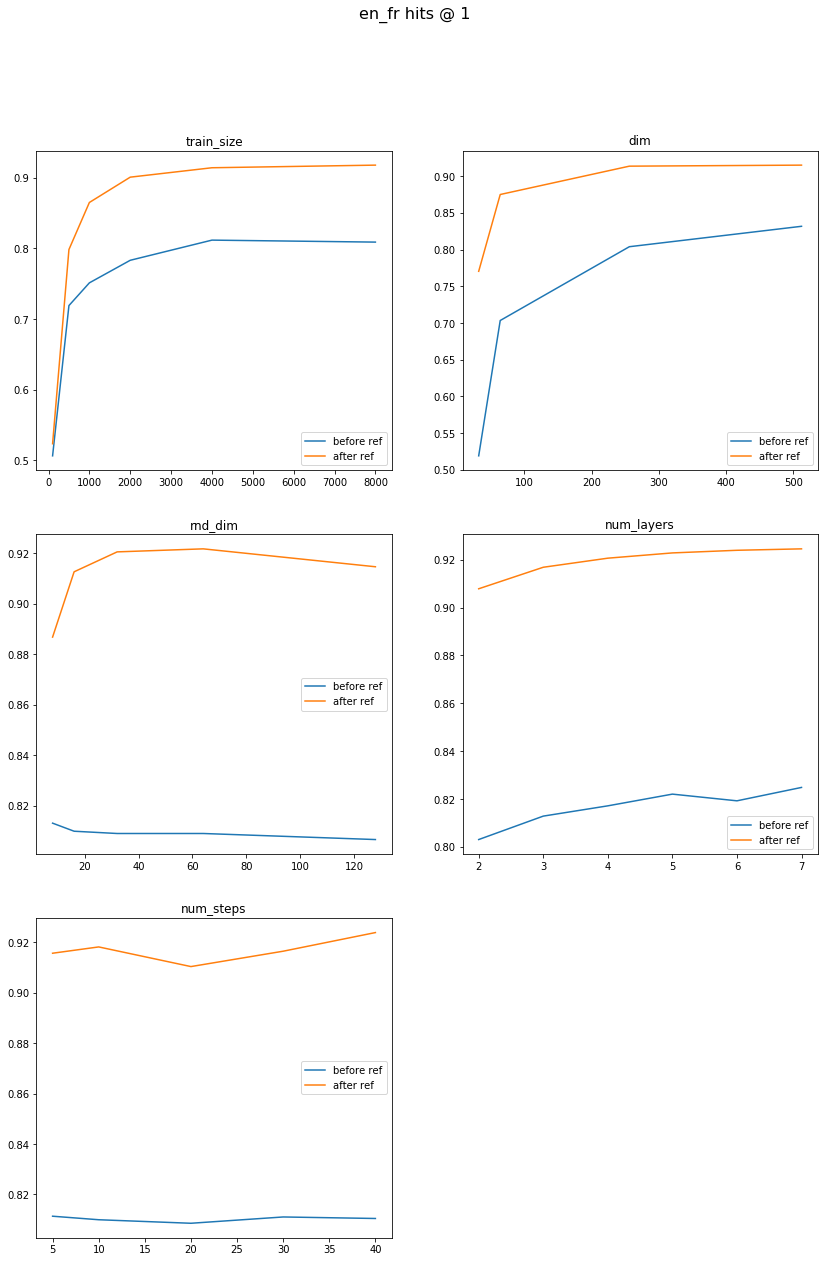

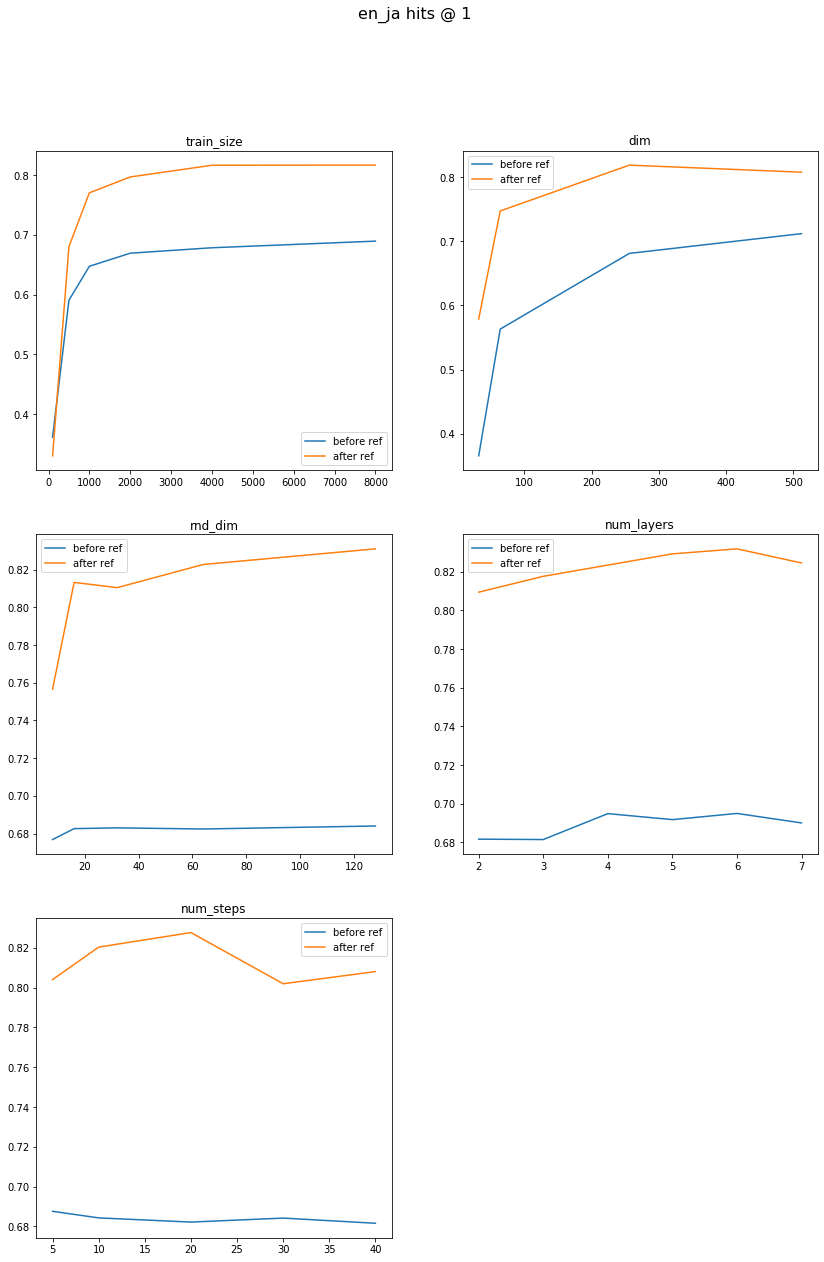

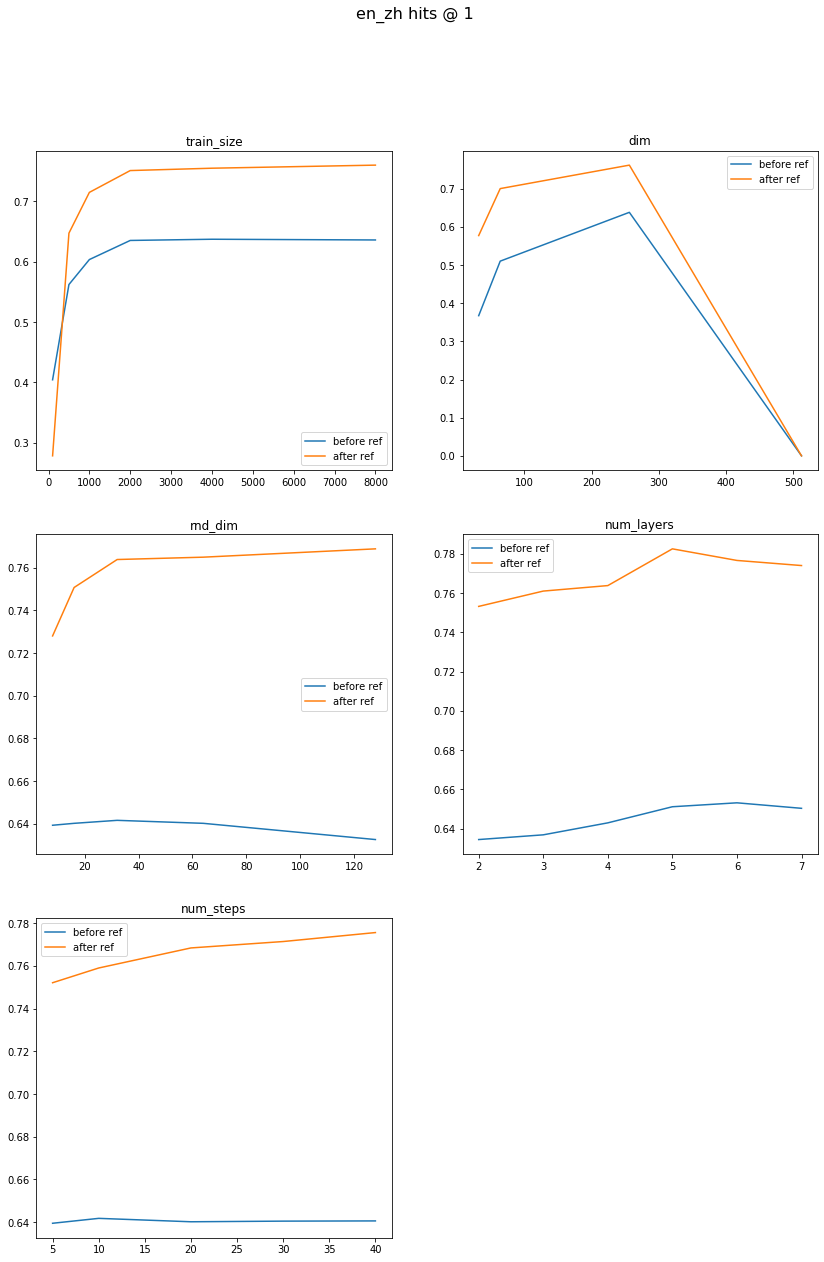

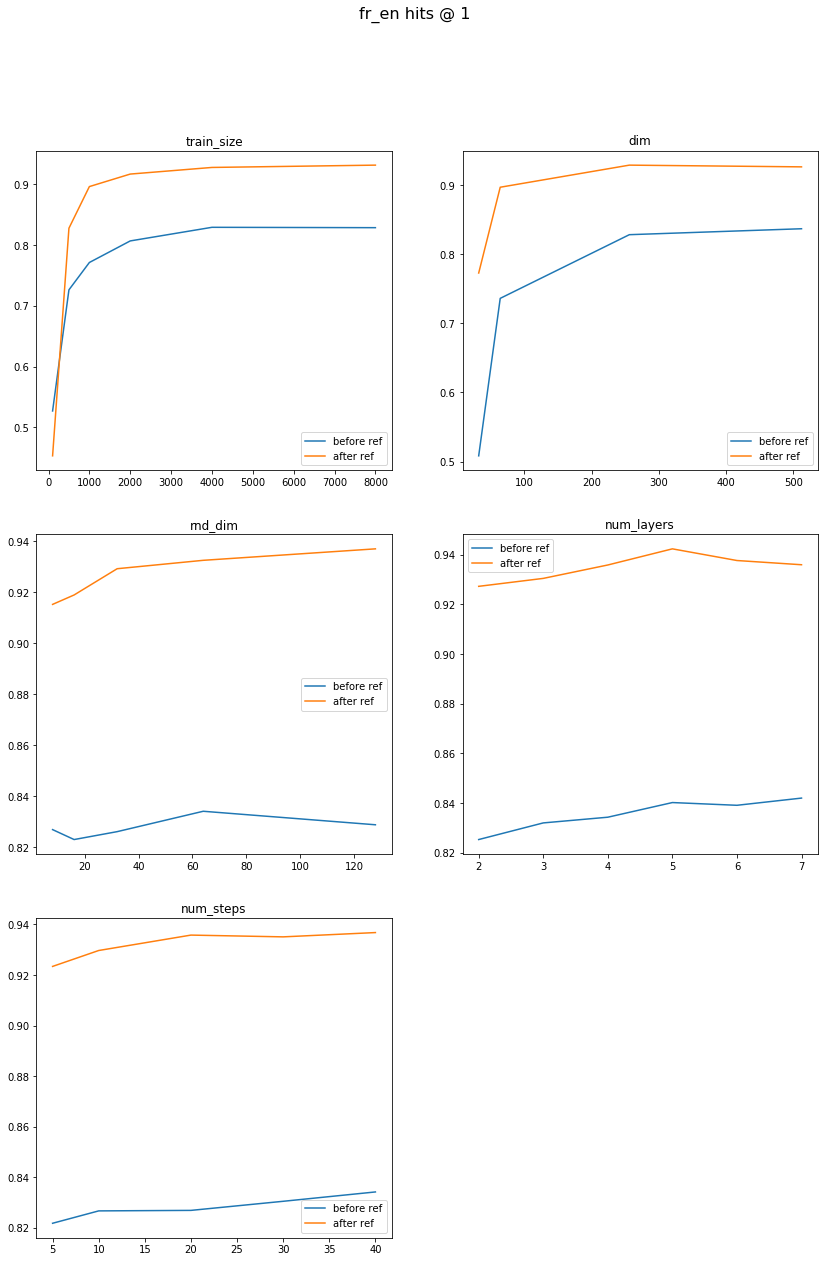

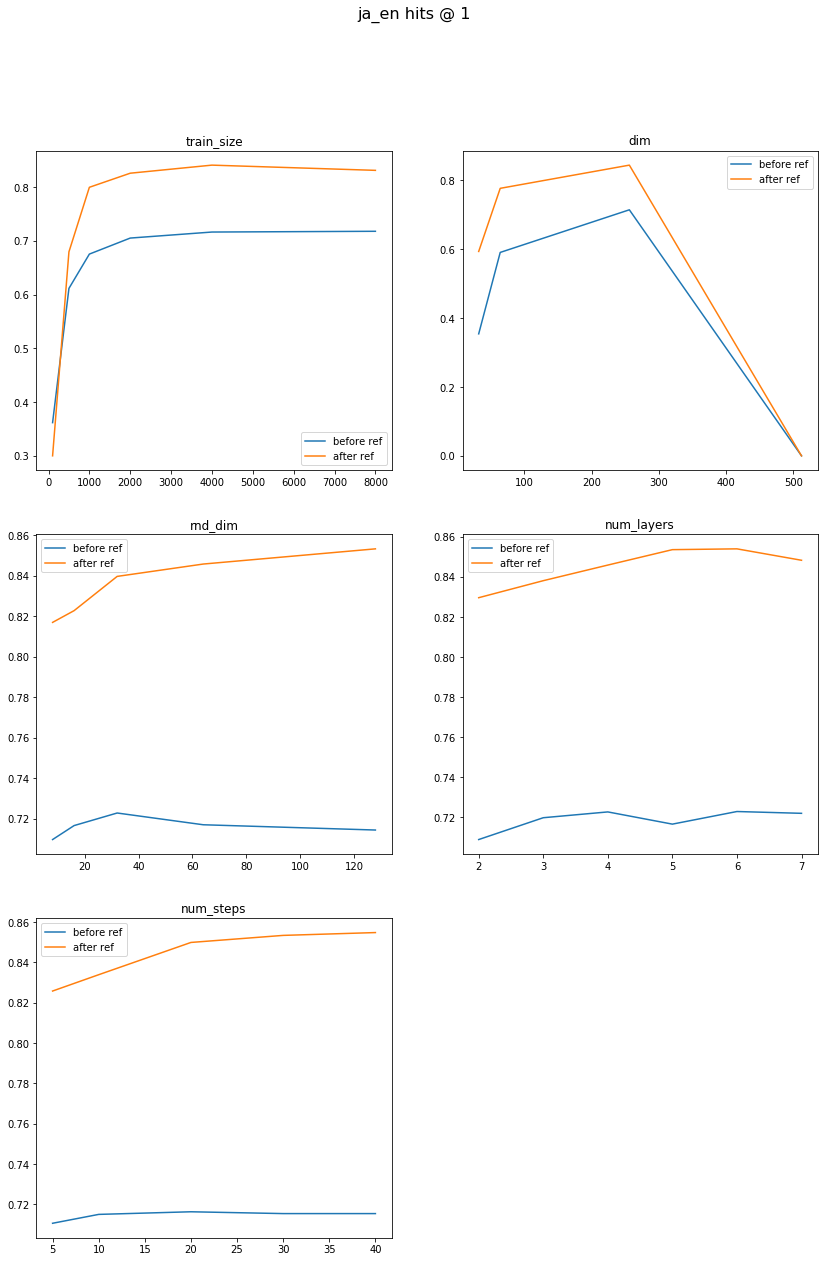

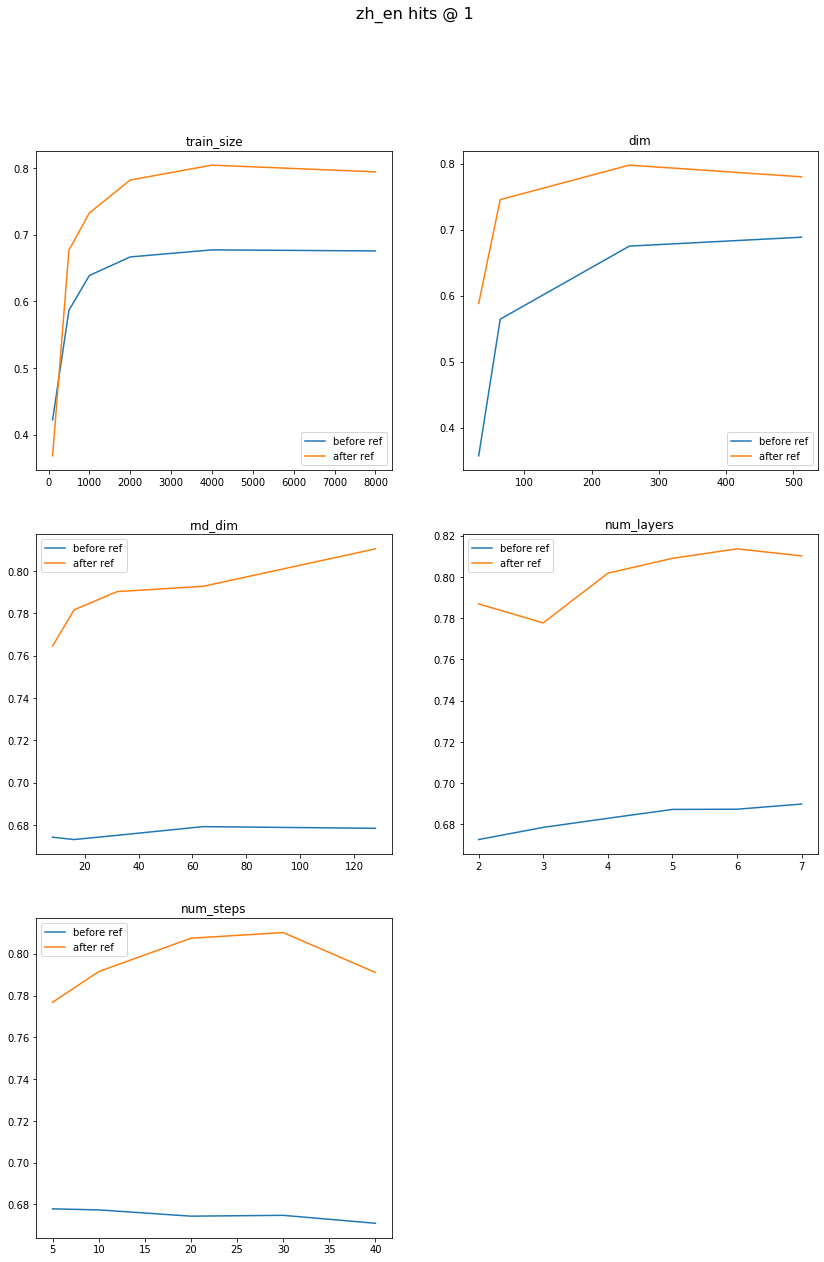

In [4]:
for pair in ['en_fr', 'en_ja', 'en_zh', 'fr_en', 'ja_en', 'zh_en']:
    plt.figure(figsize=(14, 20))
    for i, param in enumerate(param_dict.keys()):
        plt.subplot(3, 2, i+1)
        plt.plot(param_dict[param], before_ref_1[pair][param], label='before ref')
        plt.plot(param_dict[param], after_ref_1[pair][param], label='after ref')
        plt.title(param)
        plt.legend()

    _ = plt.suptitle(f'{pair} hits @ 1', fontsize=16)
    plt.savefig(f'{pair}_hits1.jpg')

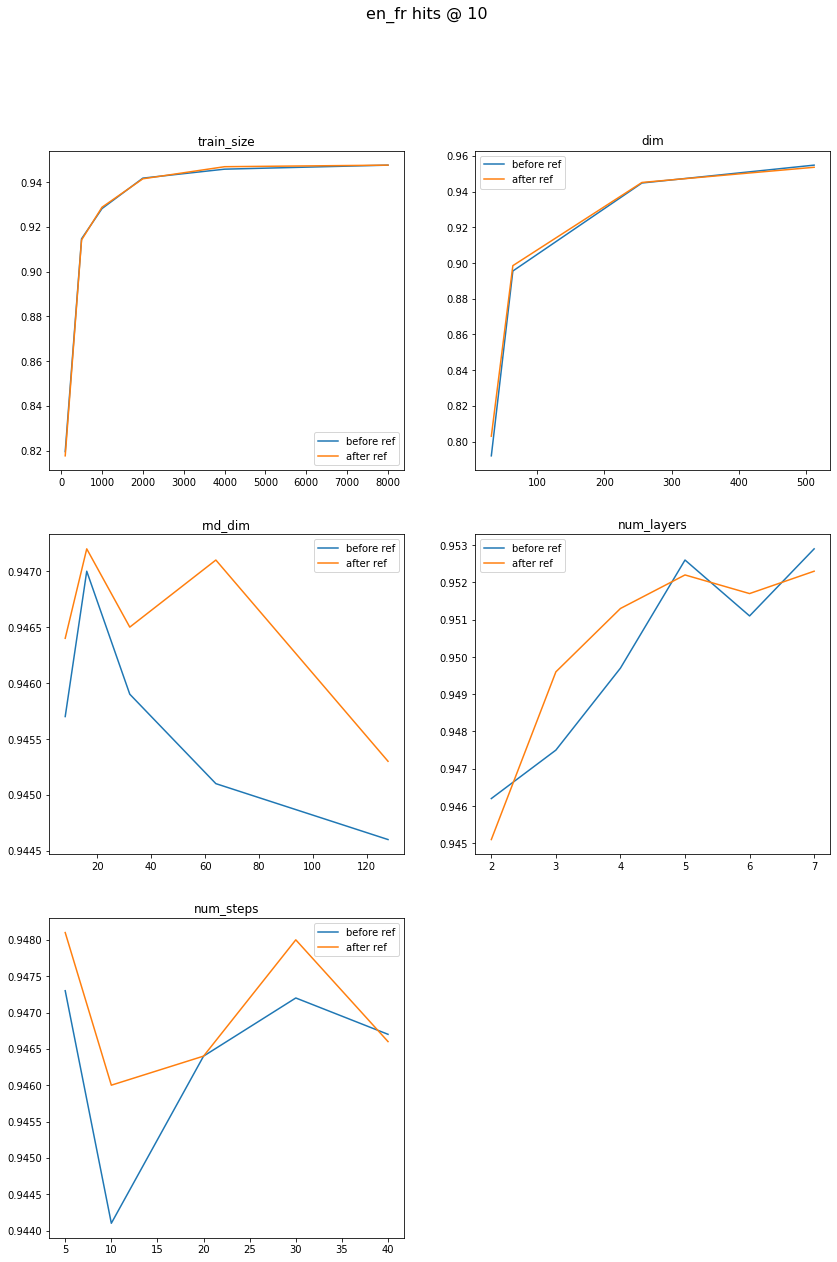

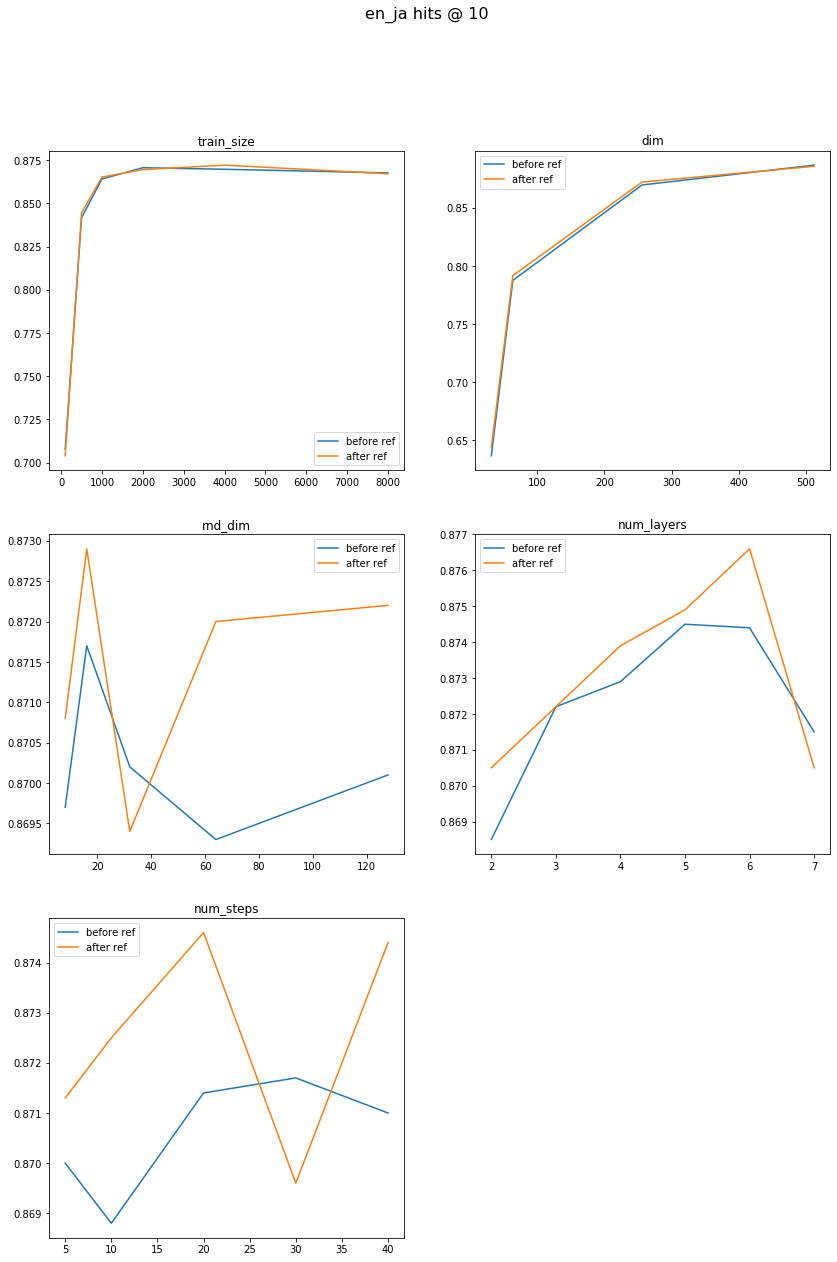

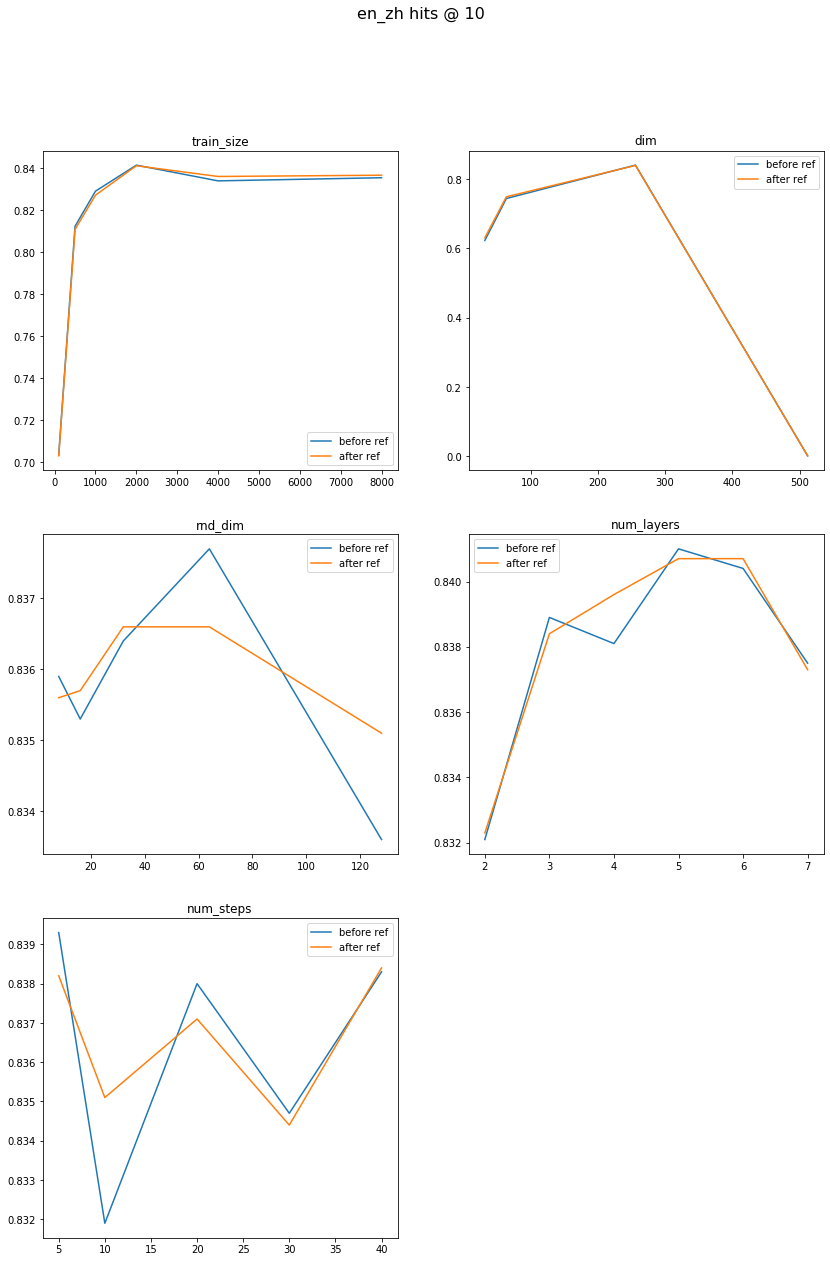

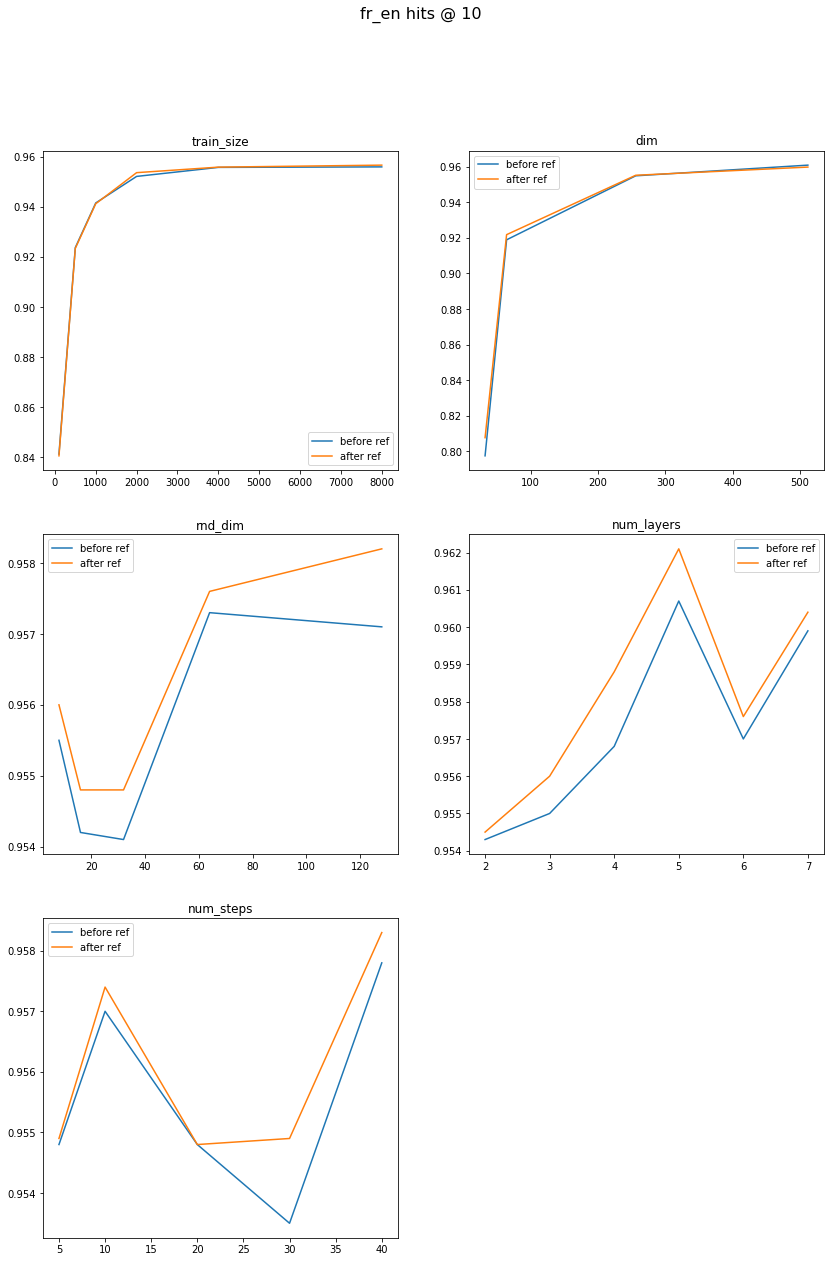

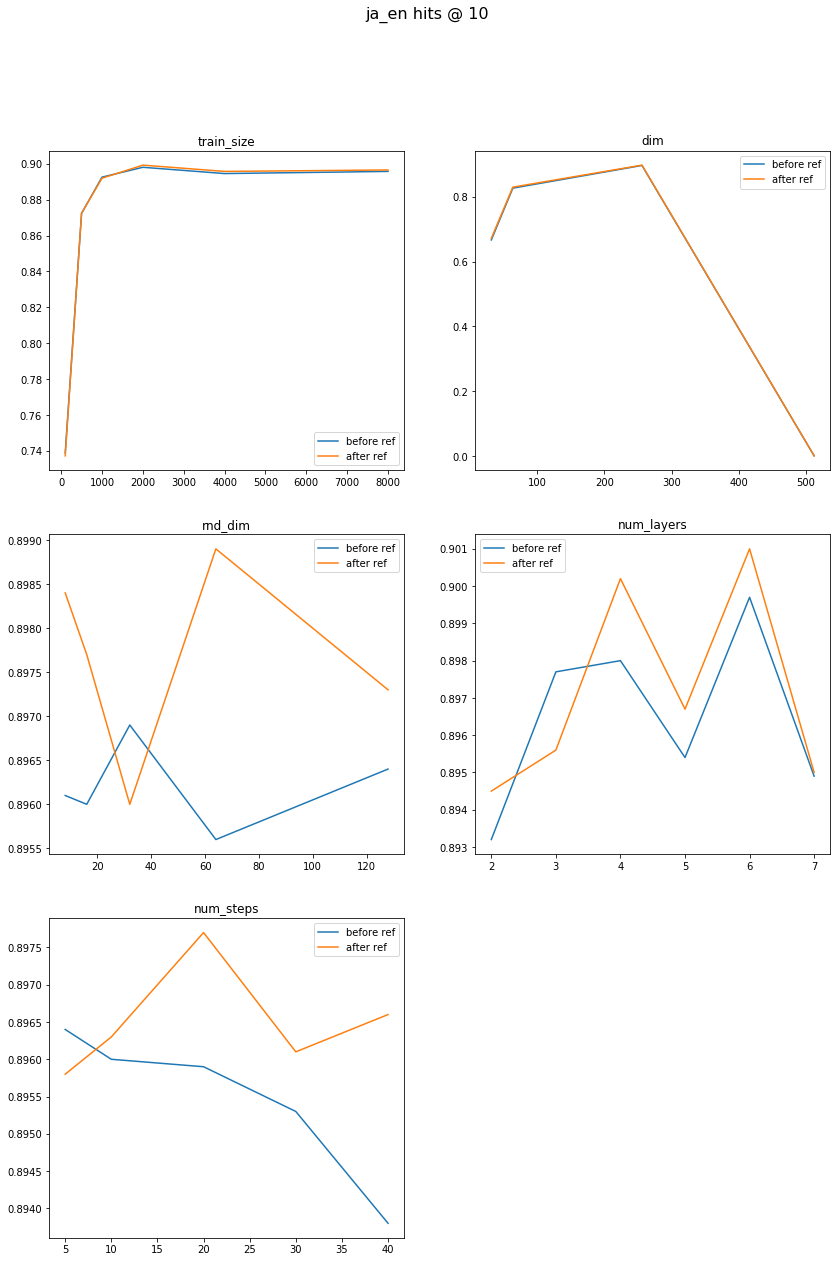

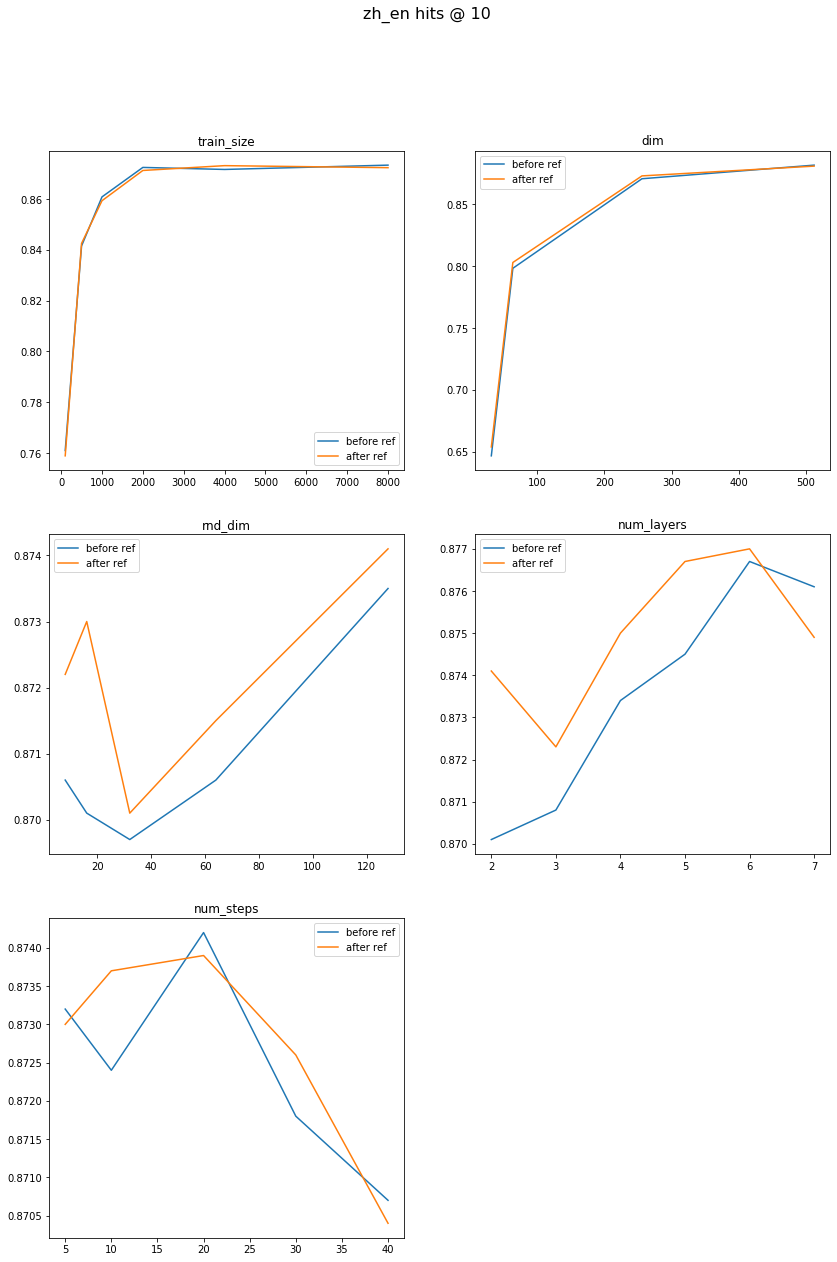

In [5]:
for pair in ['en_fr', 'en_ja', 'en_zh', 'fr_en', 'ja_en', 'zh_en']:
    plt.figure(figsize=(14, 20))
    for i, param in enumerate(param_dict.keys()):
        plt.subplot(3, 2, i+1)
        plt.plot(param_dict[param], before_ref_10[pair][param], label='before ref')
        plt.plot(param_dict[param], after_ref_10[pair][param], label='after ref')
        plt.title(param)
        plt.legend()

    _ = plt.suptitle(f'{pair} hits @ 10', fontsize=16)
    plt.savefig(f'{pair}_hits10.jpg')

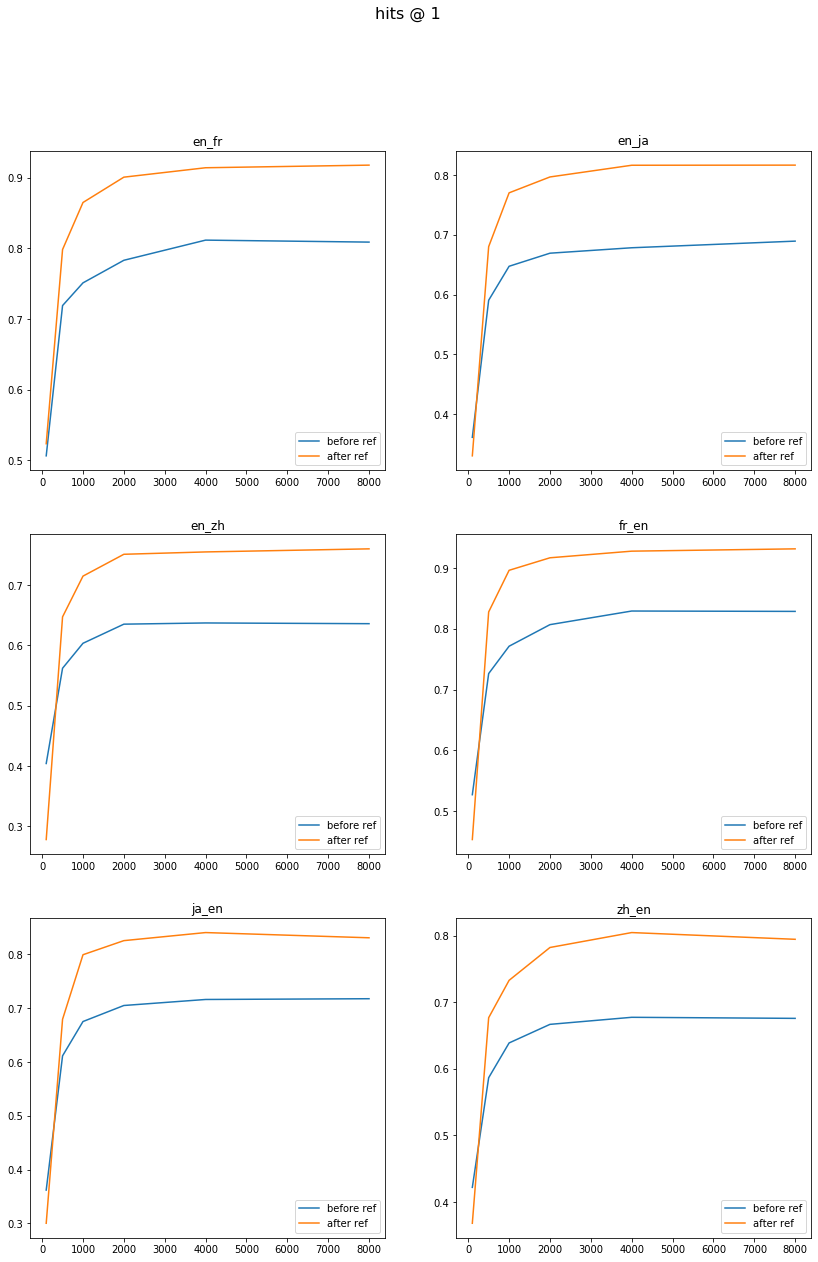

In [11]:
plt.figure(figsize=(14, 20))
for i, pair in enumerate(['en_fr', 'en_ja', 'en_zh', 'fr_en', 'ja_en', 'zh_en']):
    plt.subplot(3, 2, i+1)
    for i, param in enumerate(['train_size']):
        
        plt.plot(param_dict[param], before_ref_1[pair][param], label='before ref')
        plt.plot(param_dict[param], after_ref_1[pair][param], label='after ref')
        plt.title(pair)
        plt.legend()

    
_ = plt.suptitle(f'hits @ 1', fontsize=16)
plt.savefig(f'hits1_report.jpg')

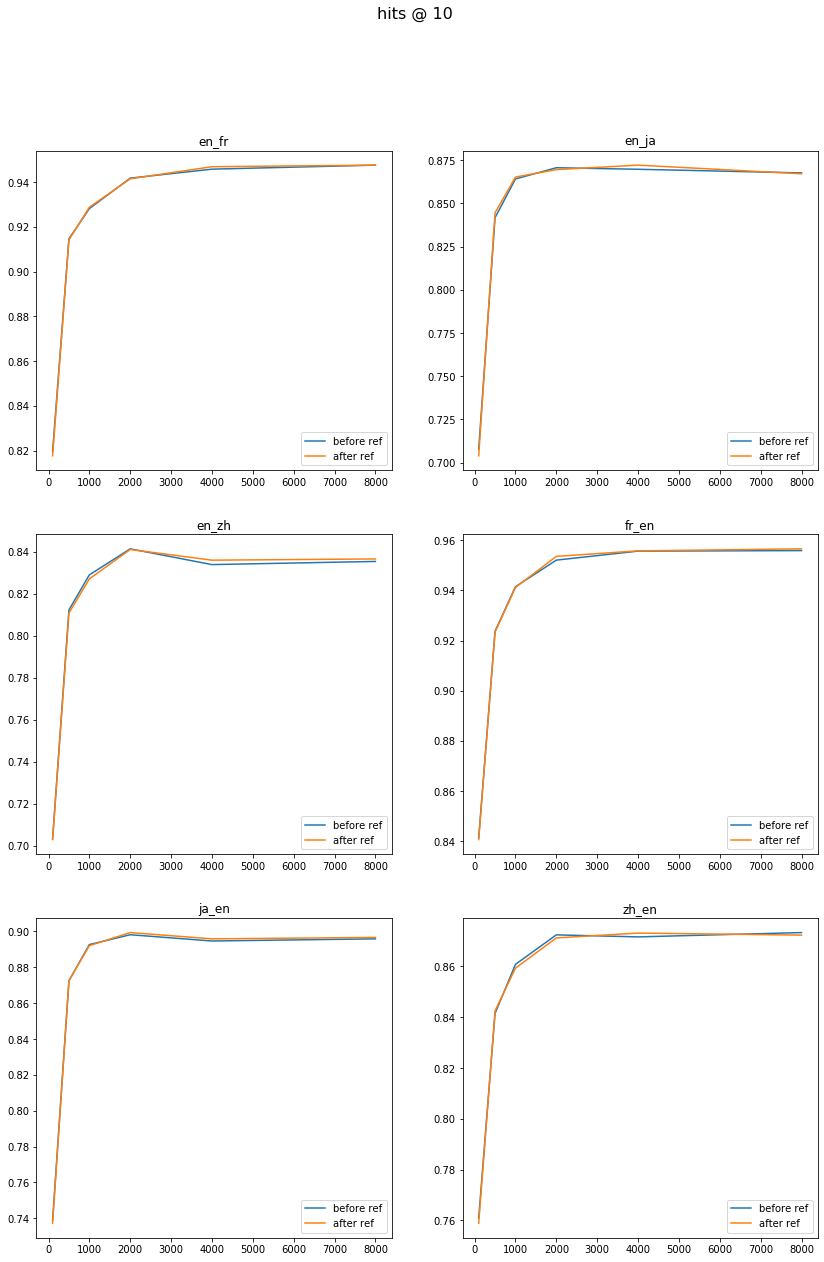

In [12]:
plt.figure(figsize=(14, 20))
for i, pair in enumerate(['en_fr', 'en_ja', 'en_zh', 'fr_en', 'ja_en', 'zh_en']):
    plt.subplot(3, 2, i+1)
    for i, param in enumerate(['train_size']):
        
        plt.plot(param_dict[param], before_ref_10[pair][param], label='before ref')
        plt.plot(param_dict[param], after_ref_10[pair][param], label='after ref')
        plt.xlabel('train_size')
    
        plt.title(pair)
        plt.legend()

    
_ = plt.suptitle(f'hits @ 10', fontsize=16)
plt.savefig(f'hits10_report.jpg')